In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
L = 1.0       # длина области по x
T = 1.0       # конечное время
M = 10        # число делений по пространству (от 0 до M, итого M+1 узлов)
N = 10        # число шагов по времени (от 0 до N, итого N+1 слоев)
h = L / M     # шаг по x
k = T / N     # шаг по времени

# Создание сетки по x и t
x = np.linspace(0, L, M + 1)
t = np.linspace(0, T, N + 1)

# Инициализация массива для решения: строки соответствуют моментам времени, столбцы – пространству.
u = np.zeros((N + 1, M + 1))

# Начальные условия: u(x,0)=0 для всех x.
u[0, :] = 0

# Условие начальной скорости u_t(x,0)=0 не требует коррекции для u^1, т.к. при применении центральной разностной аппроксимации
# для u_i^1 получается, что внутренние узлы равны 0.
# Граничные условия на первом временном слое:
u[1, 0] = -2 * t[1]        # u(0,t) = -2t
u[1, -1] = -(t[1])**2       # u(1,t) = -t^2


Значения u(x,t) на сетке (строки соответствуют времени, столбцы – x):
[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-0.2   0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.01]
 [-0.4  -0.2   0.    0.    0.    0.    0.    0.    0.   -0.01 -0.04]
 [-0.6  -0.4  -0.2   0.    0.    0.    0.    0.   -0.01 -0.04 -0.09]
 [-0.8  -0.6  -0.4  -0.2   0.    0.    0.   -0.01 -0.04 -0.09 -0.16]
 [-1.   -0.8  -0.6  -0.4  -0.2   0.   -0.01 -0.04 -0.09 -0.16 -0.25]
 [-1.2  -1.   -0.8  -0.6  -0.4  -0.21 -0.04 -0.09 -0.16 -0.25 -0.36]
 [-1.4  -1.2  -1.   -0.8  -0.61 -0.44 -0.29 -0.16 -0.25 -0.36 -0.49]
 [-1.6  -1.4  -1.2  -1.01 -0.84 -0.69 -0.56 -0.45 -0.36 -0.49 -0.64]
 [-1.8  -1.6  -1.41 -1.24 -1.09 -0.96 -0.85 -0.76 -0.69 -0.64 -0.81]
 [-2.   -1.81 -1.64 -1.49 -1.36 -1.25 -1.16 -1.09 -1.04 -1.01 -1.  ]]


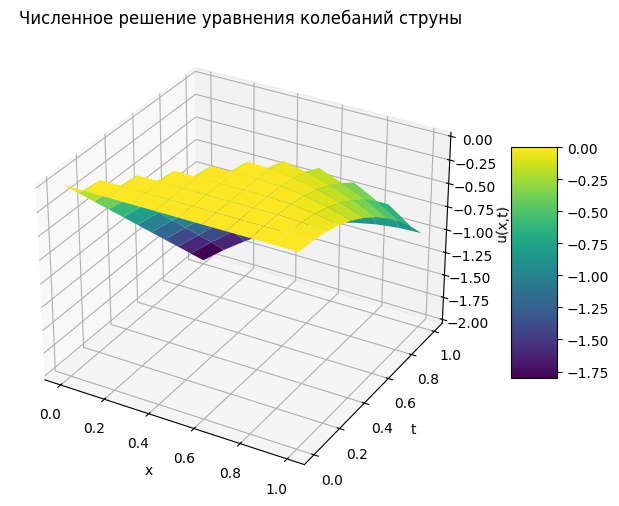

In [3]:
# Для внутренних узлов при j=1 значения остаются равными 0 (так как все члены равны 0).
# Рекуррентная схема для j=1,2,...,N-1:
# Схема: u_i^{j+1} = 2u_i^j - u_i^{j-1} + (u_{i+1}^j - 2u_i^j + u_{i-1}^j)
# При h=k коэффициент (k/h)^2 = 1.
for j in range(1, N):
    # Вычисляем внутренние узлы для следующего временного слоя
    for i in range(1, M):
        u[j+1, i] = 2 * u[j, i] - u[j-1, i] + (u[j, i+1] - 2 * u[j, i] + u[j, i-1])
    # Применяем граничные условия для нового временного слоя:
    u[j+1, 0] = -2 * t[j+1]        # u(0,t) = -2t
    u[j+1, -1] = -(t[j+1])**2        # u(1,t) = -t^2

# Выводим полученное решение в виде таблицы
print("Значения u(x,t) на сетке (строки соответствуют времени, столбцы – x):")
print(u)

# Дополнительно можно визуализировать решение:
X, T_grid = np.meshgrid(x, t)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T_grid, u, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('Численное решение уравнения колебаний струны')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
